**Hello World Example**

_This notebook is heavily based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow._

# Setup

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "feedforward"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from https://www.openml.org. 

In [2]:
import math
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784',version=1,cache=True,return_X_y=True)

# Use the notion of y=f(X)
y = y.astype(int)
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0


We can use the matplotlib library to plot the image as a grayscale image with pyplot. Let's find images labeled 7.   

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index7 = np.where(y==7)[0]
print('There are {0} images that are labeled 7'.format(index7.shape[0]))

# randomly pick an image
pick = index7[np.random.choice(index7.shape[0])]
digit_7 = X[pick,:]
# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)
plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
# plt.axis("on")
# print to file
save_fig("digit_7_plot")
plt.show()

There are 7293 images that are labeled 7


TypeError: ignored

Function by Aurelien Geron to plot sample images in a matrix.

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# Test and Training Data

Split data into test and training data after re-shuffling the data. We can simply take the first 60000 as training and the last 10000 as test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/7, stratify=y, random_state=42)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for training'.format(X_test.shape[0]))

# Binary classifier

Set up a binary classifier for 7 and not 7. We create new labels which are true meaning we have a 7 and false meaning we do not have a 7. 

In [ ]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)
print('We have a training set with {0} images of 7, and a test set with {1}'.format(sum(y_train_7),sum(y_test_7)))


Could compare with logistic regression

In [4]:
compare_logistic = False

if compare_logistic:
    from sklearn.linear_model import LogisticRegression
    bin_clf = LogisticRegression(max_iter=100, solver='liblinear')
    bin_clf.fit(X_train, y_train_7)

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(max_iter=100,solver='sgd',verbose='true')
nn_clf.fit(X_train, y_train_7)

Iteration 1, loss = 0.44667784
Iteration 2, loss = 0.06246452
Iteration 3, loss = 0.04905597
Iteration 4, loss = 0.04185977
Iteration 5, loss = 0.03846820
Iteration 6, loss = 0.03400229
Iteration 7, loss = 0.03150803
Iteration 8, loss = 0.02875700
Iteration 9, loss = 0.02653057
Iteration 10, loss = 0.02518939
Iteration 11, loss = 0.02404423
Iteration 12, loss = 0.02413391
Iteration 13, loss = 0.02236147
Iteration 14, loss = 0.02051991
Iteration 15, loss = 0.01998433
Iteration 16, loss = 0.01880709
Iteration 17, loss = 0.01778997
Iteration 18, loss = 0.01867177
Iteration 19, loss = 0.01673405
Iteration 20, loss = 0.01632820
Iteration 21, loss = 0.01539621
Iteration 22, loss = 0.01466276
Iteration 23, loss = 0.01437517
Iteration 24, loss = 0.01410239
Iteration 25, loss = 0.01355294
Iteration 26, loss = 0.01298412
Iteration 27, loss = 0.01254933
Iteration 28, loss = 0.01211401
Iteration 29, loss = 0.01160181
Iteration 30, loss = 0.01119092
Iteration 31, loss = 0.01126180
Iteration 32, los

MLPClassifier(max_iter=100, solver='sgd', verbose='true')

Let's see what the network looks like

In [ ]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))


Number of layers 3
Layer 0: Weights (784, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


Let's calculate accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train_7, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test_7, y_pred_test)))

Classifier accuracy on the training set is 0.9995666666666667 
Classifier accuracy on the test set is 0.9906 


Let's pick a 7 out of the test set where our classifier gets it wrong

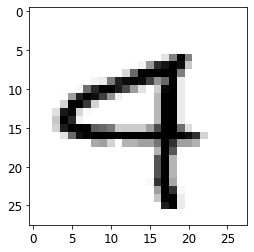

Classifier prediction is [ True] that the image is a 7


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index7 = np.where(np.equal(y_test_7,np.logical_not(y_pred_test)))[0]
# randomly pick an image again
pick = index7[np.random.choice(index7.shape[0])]
digit_7 = X_test[pick,:]
# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)
plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
# plt.axis("on")
plt.show()

print('Classifier prediction is {0} that the image is a 7'.format(nn_clf.predict([digit_7])))

Let's calculate precision, recall and the f1 score; easy to crunch numbers ourselves but its built in.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def print_classifier_scores( y_true, y_res ) :
    print('Precision is {0} '.format(precision_score(y_true, y_res)))
    print('Recall is {0} '.format(recall_score(y_true, y_res)))
    print('F1 is {0} '.format(f1_score(y_true, y_res)))
    print( 'And the confusion matrix: \n {0}'.format(confusion_matrix(y_true, y_res) ))

print('Classifier scores on training set: ')
print_classifier_scores(y_train_7,y_pred)
print('Classifier scores on test set: ')
print_classifier_scores(y_test_7,y_pred_test)


Classifier scores on training set: 
Precision is 0.9960159362549801 
Recall is 0.9998400255959047 
F1 is 0.9979243174197668 
And the confusion matrix: 
 [[53724    25]
 [    1  6250]]
Classifier scores on test set: 
Precision is 0.9601941747572815 
Recall is 0.9491362763915547 
F1 is 0.9546332046332047 
And the confusion matrix: 
 [[8917   41]
 [  53  989]]


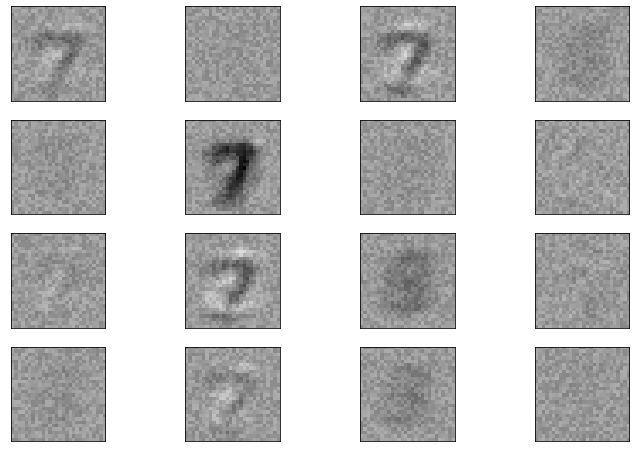

In [ ]:
# Snippet from sklearn tutorial to visualize weights

fig, axes = plt.subplots(4, 4,figsize=(12, 8))

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn_clf.coefs_[0].min(), nn_clf.coefs_[0].max()
# vmin, vmax = vmin, .7 * vmax

for coef, ax in zip(nn_clf.coefs_[0].T, axes.ravel()):
    ax.imshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=vmin, vmax=vmax ) 
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


In [ ]:
import warnings
nEpochs = 50

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd')

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(X_train, y_train_7)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(1-accuracy_score(y_train_7, nn_clf.predict(X_train)))
    test_errors.append(1-accuracy_score(y_test_7, nn_clf.predict(X_test)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("1-accuracy", fontsize=14)  
    
    

Iteration 0, loss = 0.3596273553342716
Iteration 1, loss = 0.05969570123727212
Iteration 2, loss = 0.04961092585136913
Iteration 3, loss = 0.043770709859109046
Iteration 4, loss = 0.039725222684322645
Iteration 5, loss = 0.037219375656200954
Iteration 6, loss = 0.03531738017192404
Iteration 7, loss = 0.032551326282550516
Iteration 8, loss = 0.03120092469319602
Iteration 9, loss = 0.028830584670790572
Iteration 10, loss = 0.027415342181144286
Iteration 11, loss = 0.026122838113111276
Iteration 12, loss = 0.025703420703440016
Iteration 13, loss = 0.023966934733717738
Iteration 14, loss = 0.02293510879807085
Iteration 15, loss = 0.022740565813575007
Iteration 16, loss = 0.02207312452852988
Iteration 17, loss = 0.020705995940240376
Iteration 18, loss = 0.01991491195990878
Iteration 19, loss = 0.018901590649026648
Iteration 20, loss = 0.0187593325789656
Iteration 21, loss = 0.017869024495912943
Iteration 22, loss = 0.017901904433065233
Iteration 23, loss = 0.016621999718110063
Iteration 24,

# Multiclass classification

Same idea than with binary classification but with multiple outputs

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_mclf = MLPClassifier(max_iter=100,solver='sgd',verbose='true',validation_fraction=0.0)

nn_mclf.fit(X_train, y_train)

In [ ]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_mclf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_mclf.coefs_[lyr].shape, nn_mclf.intercepts_[lyr].shape))


In [ ]:
print('Classifier prediction is that the image belongs to class {0}'.format(nn_mclf.predict([digit_7])))

In [ ]:
y_train_pred = nn_mclf.predict(X_train)
y_test_pred = nn_mclf.predict(X_test)
conf_mx_train  = confusion_matrix(y_train, y_train_pred)
conf_mx_test  = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix (training): \n{0}'.format(conf_mx_train))
print('Confusion matrix (test): \n{0}'.format(conf_mx_test))

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Make errors more visible by printing the ratio and zeroing out the diagonal.

In [ ]:
row_sums = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_test / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()